In [ ]:
! pip install squarify

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [ ]:
# READ SALARIES CSV
salaries = pd.read_csv("salaries.csv")
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [ ]:
char_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
for col in char_columns:
  unique_values = salaries[col].unique()
  print(unique_values)

['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'PT' 'FL']
['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science' 'Data Specialist'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI Software Engineer'
 'Machine Learning Scientist' 'Data Science Engineer'
 'Machine Learning Operations Engineer' 'Analytics Engineer'
 'Data Management Analyst' 'Encounter Data Management Professional'
 'Data Analytics Specialist' 'Head of Data' 'Data Analytics Lead'
 'Research Engineer' 'AI Scientist' 'Business Intelligence Developer'
 'Machine Learning Developer' 'Data Management Specialist'
 'Data Infrastructure Engineer' 'BI

Barplot

In [ ]:
roles = pd.DataFrame(salaries.groupby("job_title")["salary_in_usd"].mean())
roles.reset_index(inplace=True)
roles = roles.sort_values(['salary_in_usd'], ascending=False).reset_index(drop=True)
roles_15 = roles.head(15)

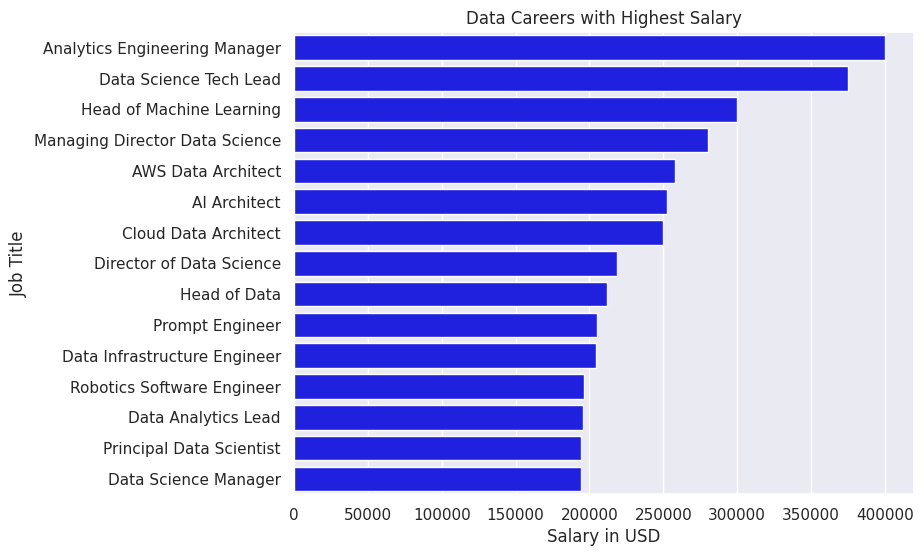

In [ ]:
# Make a barplot
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
sns.barplot(
    x="salary_in_usd",
    y="job_title",
    data=roles_15,
    color='blue'
)
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.title('Data Careers with Highest Salary')
plt.show()

Pie plot

In [ ]:
# processing
types = pd.DataFrame(salaries.groupby("employment_type")["salary_in_usd"].median())
types.reset_index(inplace=True)
drip = {'CT': 'Contract', 'FL': 'Freelancer', 'FT': 'Full time', 'PT': 'Part Time'}
types['employment'] = types['employment_type'].map(drip)
types

,employment_type,salary_in_usd,employment
0,CT,93856.0,Contract
1,FL,47777.5,Freelancer
2,FT,141525.0,Full time
3,PT,66451.5,Part Time


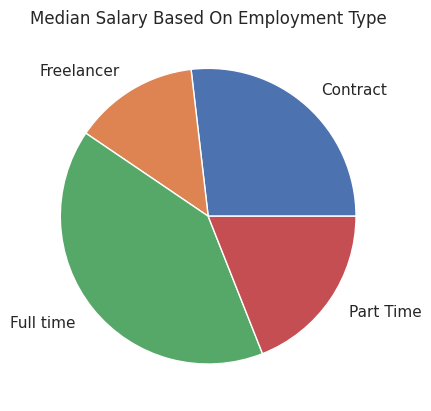

In [ ]:
plt.pie(types['salary_in_usd'], labels=types['employment'], labeldistance=1.15)
plt.title('Median Salary Based On Employment Type')
plt.show()

Treemap

In [ ]:
exp = {'SE': 'Senior Engineer', 'MI': 'Middle-Level Engineer', 'EN': 'Entry-level Engineer', 'EX': 'Expert'}
# processing
experience = pd.DataFrame(salaries.groupby("experience_level")["salary_in_usd"].median())
experience.reset_index(inplace=True)
experience['experience'] = experience['experience_level'].map(exp)
experience['salary'] = experience['salary_in_usd'].astype(str)
experience['exp'] = experience['experience'] + '\n' + experience['salary']
experience

,experience_level,salary_in_usd,experience,salary,exp
0,EN,83000.0,Entry-level Engineer,83000.0,Entry-level Engineer\n83000.0
1,EX,192000.0,Expert,192000.0,Expert\n192000.0
2,MI,115000.0,Middle-Level Engineer,115000.0,Middle-Level Engineer\n115000.0
3,SE,155000.0,Senior Engineer,155000.0,Senior Engineer\n155000.0


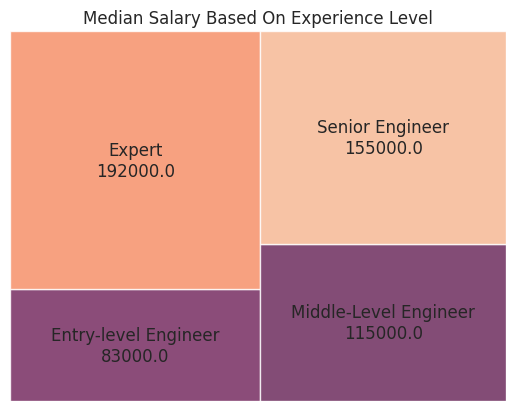

In [ ]:
# plot it
squarify.plot(sizes=experience['salary_in_usd'], label=experience['exp'], alpha=.8 )
plt.axis('off')
plt.title('Median Salary Based On Experience Level')
plt.show()

Stacked barplot

In [ ]:
employ = pd.DataFrame(salaries.groupby(["employment_type", "company_size"])['salary_in_usd'].median())
employ.reset_index(inplace=True)
drip = {'CT': 'Contract', 'FL': 'Freelancer', 'FT': 'Full time', 'PT': 'Part Time'}
employ['employment'] = employ['employment_type'].map(drip)
employ

,employment_type,company_size,salary_in_usd,employment
0,CT,L,97712.0,Contract
1,CT,M,97500.0,Contract
2,CT,S,83200.0,Contract
3,FL,L,20000.0,Freelancer
4,FL,M,55000.0,Freelancer
5,FL,S,36014.0,Freelancer
6,FT,L,136000.0,Full time
7,FT,M,143225.0,Full time
8,FT,S,76078.0,Full time
9,PT,L,35000.0,Part Time


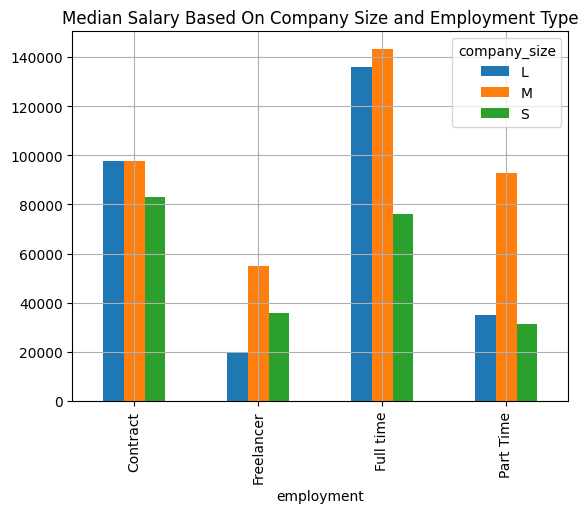

In [ ]:
# Pivot the data to have 'Product' as columns and 'Segment' as the index
pivot_df = employ.pivot(index='employment',
                    columns='company_size',
                    values='salary_in_usd')

# Create a grouped barplot
pivot_df.plot.bar(grid=True)
plt.title("Median Salary Based On Company Size and Employment Type")
plt.show()

Boxplot

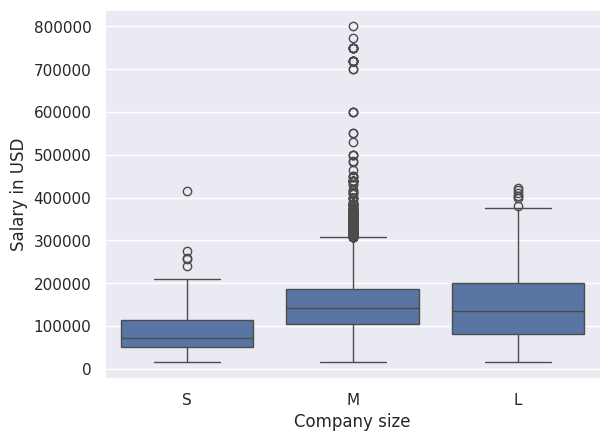

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(y=salaries['salary_in_usd'],  x=salaries['company_size'], order=['S', 'M', 'L'])
plt.xlabel('Company size')
plt.ylabel('Salary in USD')
plt.show()

Histogram

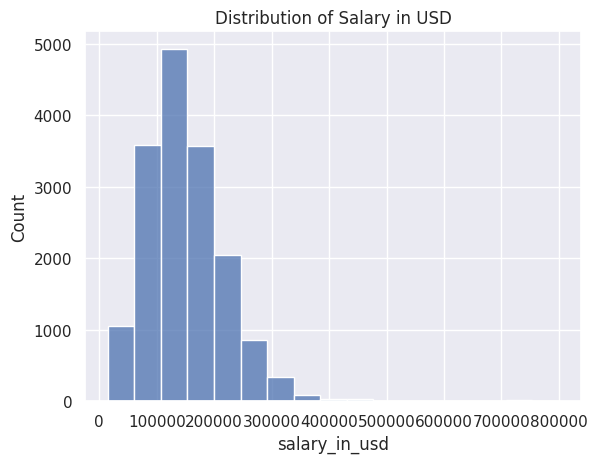

In [ ]:
sns.histplot(data=salaries, x="salary_in_usd", bins=17)
plt.title('Distribution of Salary in USD')
plt.show()

Insurance Claim Data

In [ ]:
insurance = pd.read_csv('Insurance claims data.csv')
insurance.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
print(insurance.columns)

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')


In [ ]:
print(insurance['subscription_length'].unique())

[ 9.3  8.2  9.5  5.2 10.1  3.1  4.5 10.7  0.3 10.5  5.3 10.2  1.4  5.6
 10.3  8.8  0.7  2.4  9.7 11.6  0.9  1.2  1.3 12.4  6.8 10.9  7.7  8.3
  0.8 10.6  2.8  0.2 11.8  6.4  4.3 12.1  5.5  2.6  1.8  4.6  2.7  2.2
  0.4 11.7 12.2  3.8  0.5  5.   2.   0.6  1.   1.1  4.9  1.5 11.2 11.1
 12.3  8.5  0.1  7.4  4.4  2.1  7.6  5.1  5.7  3.4  3.2  8.1  3.   8.7
  6.5 10.4  9.2  9.6 10.8  9.8  1.6  3.5 11.9  0.   8.6  5.4  9.   6.6
  6.3  5.8  7.1  2.9 11.3  3.6 10.   1.7  7.3  8.9 11.4  2.5  6.  12.5
  7.   6.2  4.   7.8  7.2  6.7 11.5  2.3  7.9  3.3 11.  12.   4.1  7.5
  3.7  4.2  8.   5.9  3.9  4.8  8.4  9.4  6.1  9.9  4.7  1.9  6.9  9.1
 13.1 13.2 13.5 12.9 13.9 12.7 13.4 12.6 13.7 13.8 12.8 13.3 13.6 14. ]


In [ ]:
print(insurance["model"].unique())

['M4' 'M9' 'M1' 'M5' 'M7' 'M6' 'M8' 'M3' 'M2' 'M10' 'M11']


In [ ]:
print(insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

Scatterplot

<ipython-input-48-9190c244e736>:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot("vehicle_age", "customer_age", "",data=insurance, linestyle='', marker='o')


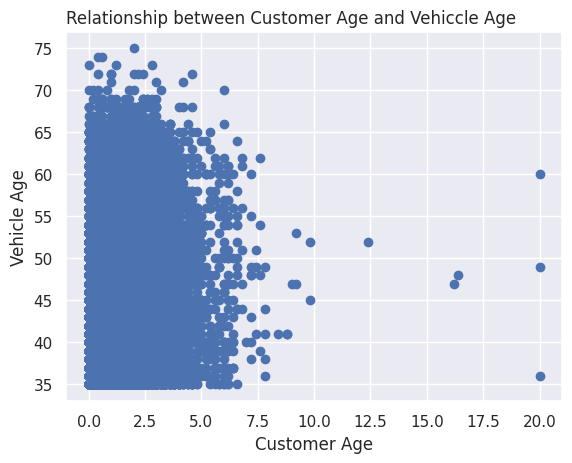

In [ ]:
plt.plot("vehicle_age", "customer_age", "",data=insurance, linestyle='', marker='o')
plt.xlabel('Customer Age')
plt.ylabel('Vehicle Age')
plt.title('Relationship between Customer Age and Vehiccle Age', loc='left')
plt.show()

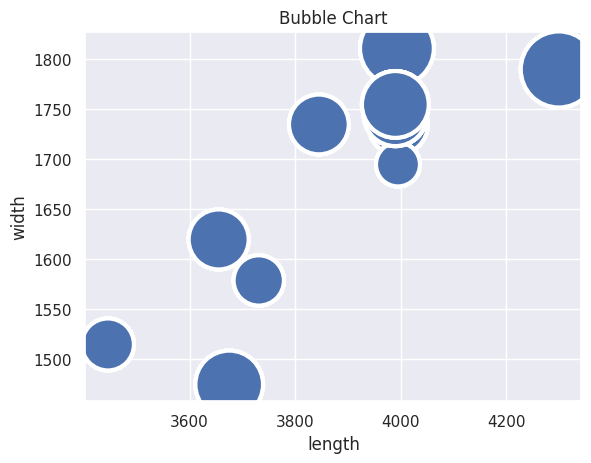

In [ ]:
# use the scatterplot function to build the bubble map
sns.scatterplot(data=insurance, x="length", y="width", size="gross_weight", legend=False, sizes=(1000, 3000))
# show the graph
plt.title("Bubble Chart")
plt.show()

Correlation Heatmap

In [ ]:
col_int = ['length', 'width', 'gross_weight', 'subscription_length', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius']
corr_df = insurance[col_int]
corr_df.head()

,length,width,gross_weight,subscription_length,region_density,airbags,displacement,cylinder,turning_radius
0,4300,1790,1720,9.3,8794,6,1493,4,5.2
1,3995,1695,1051,8.2,27003,2,1498,4,4.9
2,4300,1790,1720,9.5,8794,6,1493,4,5.2
3,3445,1515,1185,5.2,73430,2,796,3,4.6
4,3990,1755,1490,10.1,5410,2,1497,4,5.0


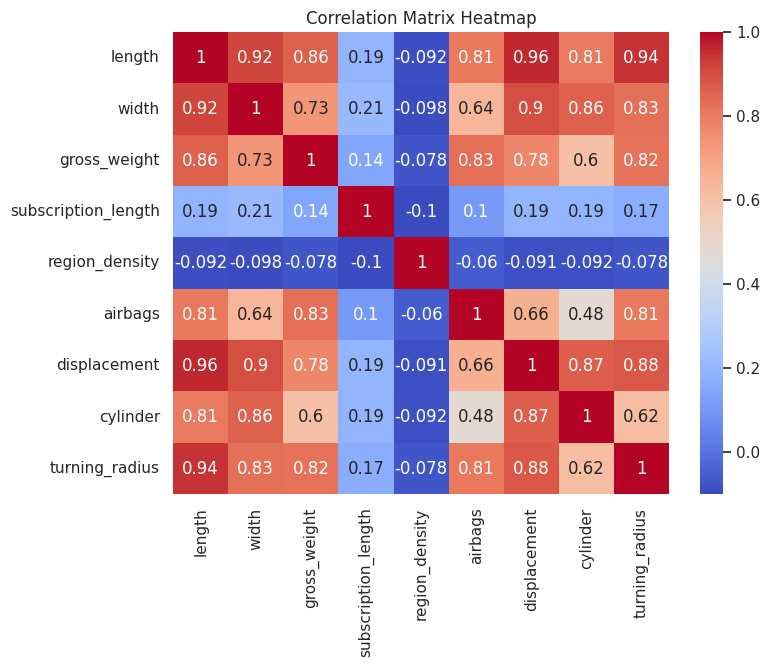

In [ ]:
# calculate correlation matrix
corr_matrix = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

Line graph

In [ ]:
age_df = pd.DataFrame(insurance.groupby("customer_age")["vehicle_age"].mean())
age_df.reset_index(inplace=True)

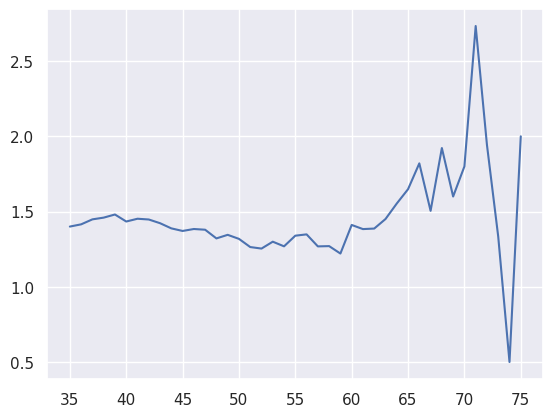

In [ ]:
# plot
plt.plot('customer_age', 'vehicle_age', data=age_df)
# show the graph
plt.show()

Area Chart

In [ ]:
sub_df = pd.DataFrame(insurance.groupby("subscription_length")['region_density'].count())
sub_df.reset_index(inplace=True)
sub_df

,subscription_length,region_density
0,0.0,276
1,0.1,853
2,0.2,489
3,0.3,685
4,0.4,815
...,...,...
135,13.6,1
136,13.7,1
137,13.8,2
138,13.9,1


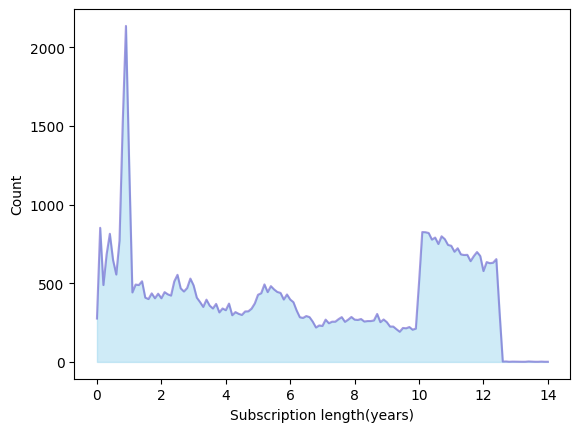

In [ ]:
# Same, but add a stronger line on top (edge)
plt.fill_between(sub_df['subscription_length'], sub_df['region_density'], color="skyblue", alpha=0.4)
plt.plot(sub_df['subscription_length'], sub_df['region_density'], color="Slateblue", alpha=0.6)
# See the line plot function to learn how to customize the plt.plot function
plt.xlabel("Subscription length(years)")
plt.ylabel("Count")
# Show the graph
plt.show()

Density plot

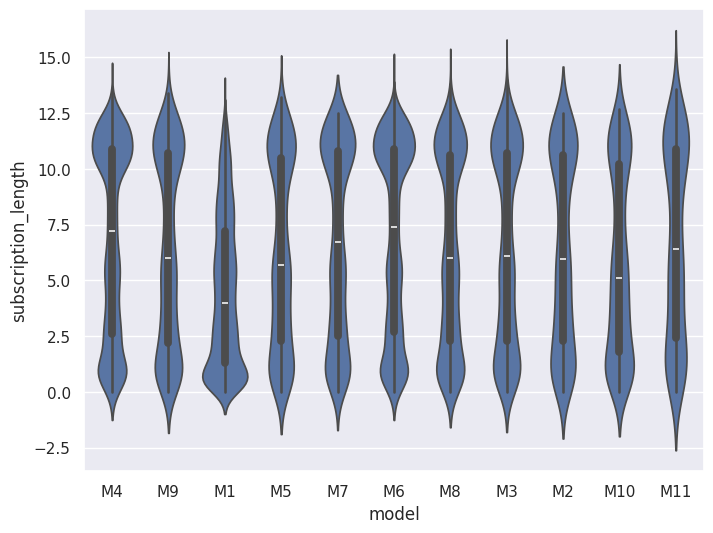

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
# specifying the group list as 'order' parameter and plotting
sns.violinplot(x='model', y='subscription_length', data=insurance)
plt.show()